In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import os
sns.set(style='white', context='notebook', palette='deep')

# dataset from UCI

In [366]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [367]:
print(train_df.shape)
print(test_df.shape)

(199523, 41)
(99762, 41)


In [368]:
train_df.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [369]:
train_df.income_level.unique()

array([-50000,  50000])

In [370]:
train_df['income_level'] = np.where(train_df['income_level'] == -50000, 0, 1)

In [371]:
test_df['income_level'] = np.where(test_df['income_level'] == -50000, 0, 1)

In [372]:
train_df.income_level.unique()

array([0, 1])

In [373]:
train_df.groupby(['income_level'])['age'].count()

income_level
0    187141
1     12382
Name: age, dtype: int64

In [374]:
print('income > 50000: {:.1f}%'.format(12382 / 187141 * 100))

income > 50000: 6.6%


In [375]:
train_df.dtypes

age                                  int64
class_of_worker                     object
industry_code                        int64
occupation_code                      int64
education                           object
wage_per_hour                        int64
enrolled_in_edu_inst_lastwk         object
marital_status                      object
major_industry_code                 object
major_occupation_code               object
race                                object
hispanic_origin                     object
sex                                 object
member_of_labor_union               object
reason_for_unemployment             object
full_parttime_employment_stat       object
capital_gains                        int64
capital_losses                       int64
dividend_from_Stocks                 int64
tax_filer_status                    object
region_of_previous_residence        object
state_of_previous_residence         object
d_household_family_stat             object
d_household

In [376]:
col_groups_dict = train_df.columns.to_series().groupby(train_df.dtypes).groups
col_groups = {k.name: v for k, v in col_groups_dict.items()}

In [377]:
col_groups_dict

{dtype('int64'): Index(['age', 'industry_code', 'occupation_code', 'wage_per_hour',
        'capital_gains', 'capital_losses', 'dividend_from_Stocks',
        'num_person_Worked_employer', 'business_or_self_employed',
        'veterans_benefits', 'weeks_worked_in_year', 'year', 'income_level'],
       dtype='object'),
 dtype('O'): Index(['class_of_worker', 'education', 'enrolled_in_edu_inst_lastwk',
        'marital_status', 'major_industry_code', 'major_occupation_code',
        'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
        'reason_for_unemployment', 'full_parttime_employment_stat',
        'tax_filer_status', 'region_of_previous_residence',
        'state_of_previous_residence', 'd_household_family_stat',
        'd_household_summary', 'migration_msa', 'migration_reg',
        'migration_within_reg', 'live_1_year_ago', 'migration_sunbelt',
        'family_members_under_18', 'country_father', 'country_mother',
        'country_self', 'citizenship', 'fill_questionn

In [378]:
cat_train = train_df[col_groups['object']]
cat_train['income_level'] = train_df['income_level']
cat_test = test_df[col_groups['object']]
num_train = train_df[col_groups['int64']]
num_test = test_df[col_groups['int64']]

In [379]:
num_train.head()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,0,0,0,0,0,0,0,0,2,0,95,0
1,58,4,34,0,0,0,0,1,0,2,52,94,0
2,18,0,0,0,0,0,0,0,0,2,0,95,0
3,9,0,0,0,0,0,0,0,0,0,0,94,0
4,10,0,0,0,0,0,0,0,0,0,0,94,0


In [380]:
cat_train.head()

,class_of_worker,education,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,...,migration_within_reg,live_1_year_ago,migration_sunbelt,family_members_under_18,country_father,country_mother,country_self,citizenship,fill_questionnaire_veteran_admin,income_level
0,Not in universe,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,NaN,Not in universe under 1 year old,NaN,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,0
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,...,Same county,No,Yes,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,0
2,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,...,NaN,Not in universe under 1 year old,NaN,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,Not in universe,0
3,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Nonmover,Yes,Not in universe,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe,0
4,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Nonmover,Yes,Not in universe,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe,0


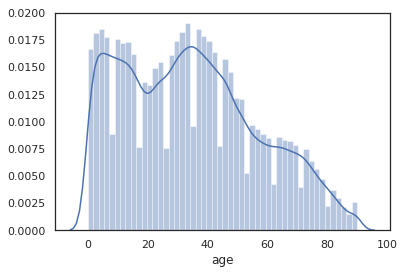

In [381]:
sns.distplot(num_train['age'], bins=50)

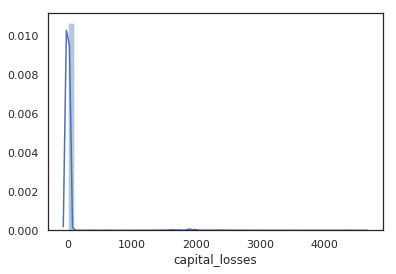

In [382]:
sns.distplot(num_train['capital_losses'])

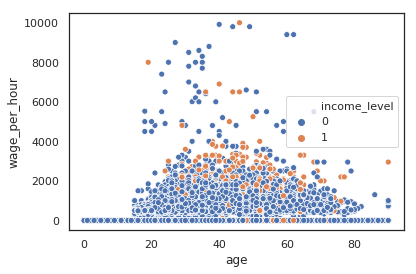

In [383]:
sns.scatterplot(y="wage_per_hour", x="age", data=num_train, hue='income_level')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

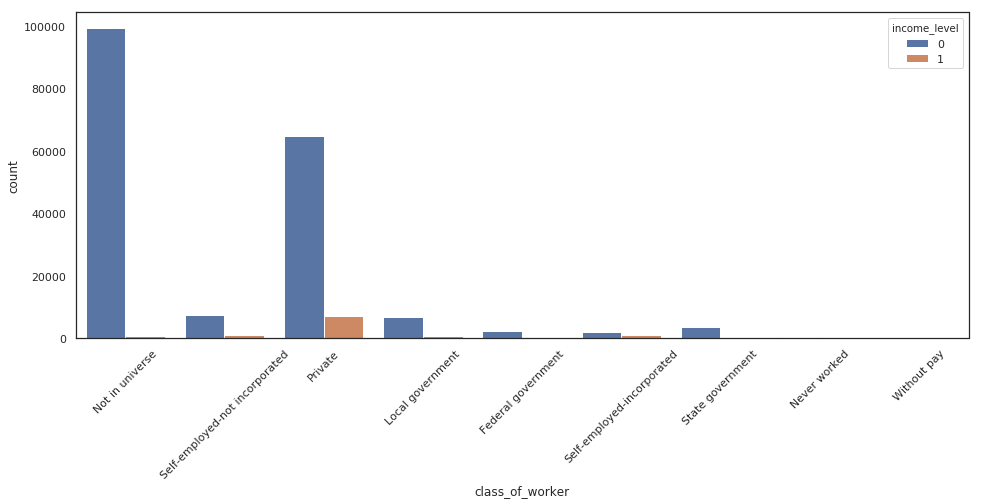

In [384]:
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(x='class_of_worker', data=cat_train, hue='income_level', ax=ax)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

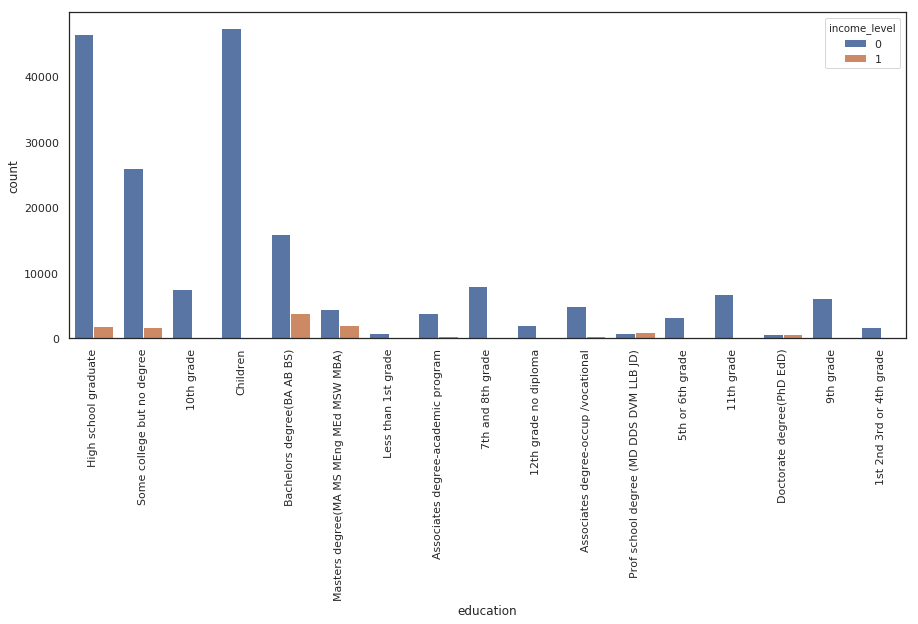

In [385]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='education', data=cat_train, hue='income_level', ax=ax)
plt.xticks(rotation=90)

In [386]:
## data cleaning

In [387]:
num_train.isnull().sum()

age                           0
industry_code                 0
occupation_code               0
wage_per_hour                 0
capital_gains                 0
capital_losses                0
dividend_from_Stocks          0
num_person_Worked_employer    0
business_or_self_employed     0
veterans_benefits             0
weeks_worked_in_year          0
year                          0
income_level                  0
dtype: int64

In [388]:
num_test.isnull().sum()

age                           0
industry_code                 0
occupation_code               0
wage_per_hour                 0
capital_gains                 0
capital_losses                0
dividend_from_Stocks          0
num_person_Worked_employer    0
business_or_self_employed     0
veterans_benefits             0
weeks_worked_in_year          0
year                          0
income_level                  0
dtype: int64

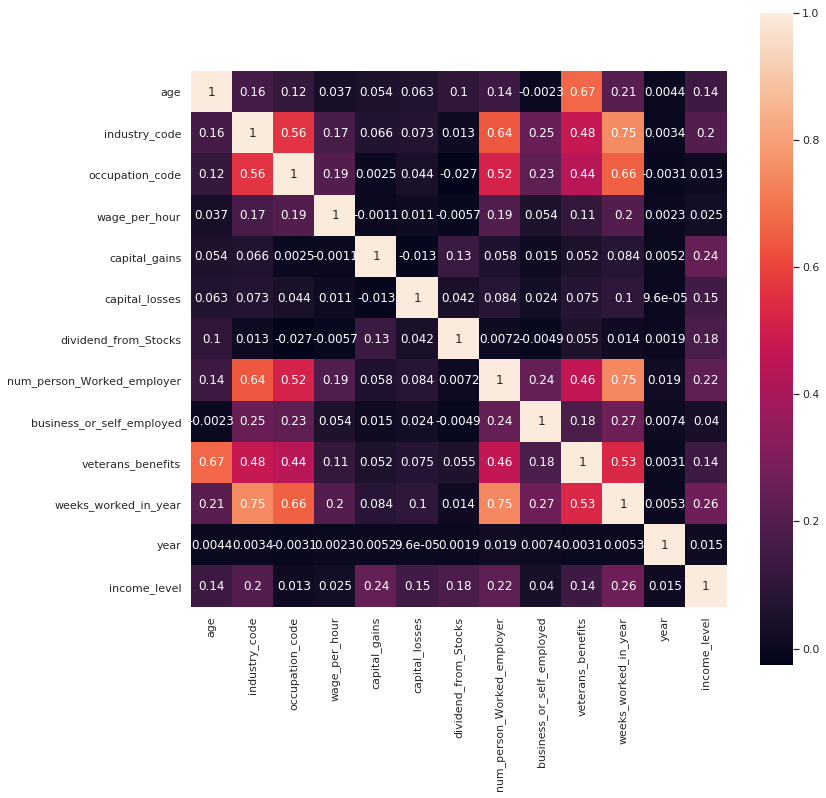

In [389]:
num_train_corr = num_train.corr()
fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(num_train_corr, square=True, annot=True, ax=ax)
plt.show()

In [390]:
num_train.drop(['weeks_worked_in_year'],axis=1,inplace=True)

In [391]:
num_test.drop(['weeks_worked_in_year'],axis=1,inplace=True)

In [392]:
cat_train.isnull().sum()/len(train_df)

class_of_worker                     0.000000
education                           0.000000
enrolled_in_edu_inst_lastwk         0.000000
marital_status                      0.000000
major_industry_code                 0.000000
major_occupation_code               0.000000
race                                0.000000
hispanic_origin                     0.004380
sex                                 0.000000
member_of_labor_union               0.000000
reason_for_unemployment             0.000000
full_parttime_employment_stat       0.000000
tax_filer_status                    0.000000
region_of_previous_residence        0.000000
state_of_previous_residence         0.003548
d_household_family_stat             0.000000
d_household_summary                 0.000000
migration_msa                       0.499672
migration_reg                       0.499672
migration_within_reg                0.499672
live_1_year_ago                     0.000000
migration_sunbelt                   0.499672
family_mem

In [393]:
#drop columns have ~50% missing values
cat_train.drop(['migration_msa','migration_reg','migration_within_reg','migration_sunbelt'],axis=1,inplace=True)
cat_test.drop(['migration_msa','migration_reg','migration_within_reg','migration_sunbelt'],axis=1,inplace=True)

In [394]:
#fill missing value

In [395]:
#hispanic origin
cat_train.groupby(['hispanic_origin'])['income_level'].count()

hispanic_origin
All other                    171907
Central or South American      3895
Chicano                         304
Cuban                          1126
Do not know                     306
Mexican (Mexicano)             7234
Mexican-American               8079
Other Spanish                  2485
Puerto Rican                   3313
Name: income_level, dtype: int64

In [396]:
cat_train['hispanic_origin'].mode()[0]

'All other'

In [397]:
cat_train['hispanic_origin'].fillna(cat_train['hispanic_origin'].mode()[0], inplace=True)
cat_test['hispanic_origin'].fillna(cat_train['hispanic_origin'].mode()[0], inplace=True)

In [398]:
cat_train.columns

Index(['class_of_worker', 'education', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'live_1_year_ago', 'family_members_under_18',
       'country_father', 'country_mother', 'country_self', 'citizenship',
       'fill_questionnaire_veteran_admin', 'income_level'],
      dtype='object')

In [399]:
for i in cat_train.columns:
    if cat_train[i].isnull().sum() != 0:
        print(i)
        cat_train[i].fillna(cat_train[i].mode()[0], inplace=True)
        cat_test[i].fillna(cat_train[i].mode()[0], inplace=True)

state_of_previous_residence
country_father
country_mother
country_self


In [400]:
cat_train.isnull().sum()

class_of_worker                     0
education                           0
enrolled_in_edu_inst_lastwk         0
marital_status                      0
major_industry_code                 0
major_occupation_code               0
race                                0
hispanic_origin                     0
sex                                 0
member_of_labor_union               0
reason_for_unemployment             0
full_parttime_employment_stat       0
tax_filer_status                    0
region_of_previous_residence        0
state_of_previous_residence         0
d_household_family_stat             0
d_household_summary                 0
live_1_year_ago                     0
family_members_under_18             0
country_father                      0
country_mother                      0
country_self                        0
citizenship                         0
fill_questionnaire_veteran_admin    0
income_level                        0
dtype: int64

for i in cat_train.columns:
    col_values = cat_train[i].unique()
    for j in col_values:
        if len(cat_train[cat_train[i]==j]) / len(cat_train) <0.05:
            cat_train[i] = cat_train[i].replace([j], 'other')
            cat_test[i] = cat_test[i].replace([j], 'other')

# <font color='red'>the above method is not good, needs to improve</font> 

In [411]:
#bin (cut) ages
num_train['age'] = pd.cut(x=num_train['age'],bins=[-1,30,60,91],labels=['young','adult','old'])
num_test['age'] = pd.cut(x=num_test['age'],bins=[-1,30,60,91],labels=['young','adult','old'])

In [412]:
num_train['age'].unique()

[old, adult, young]
Categories (3, object): [young < adult < old]

In [413]:
#assign 0 or 1 for the columns has majority 0
num_train['wage_per_hour'] = num_train['wage_per_hour'].apply(lambda x: 0 if x==0 else 1)

In [414]:
num_test['wage_per_hour'] = num_test['wage_per_hour'].apply(lambda x: 0 if x==0 else 1)
num_train['capital_gains'] = num_train['capital_gains'].apply(lambda x: 0 if x==0 else 1)
num_test['capital_gains'] = num_test['capital_gains'].apply(lambda x: 0 if x==0 else 1)
num_train['capital_losses'] = num_train['capital_losses'].apply(lambda x: 0 if x==0 else 1)
num_test['capital_losses'] = num_test['capital_losses'].apply(lambda x: 0 if x==0 else 1)
num_train['dividend_from_Stocks'] = num_train['dividend_from_Stocks'].apply(lambda x: 0 if x==0 else 1)
num_test['dividend_from_Stocks'] = num_test['dividend_from_Stocks'].apply(lambda x: 0 if x==0 else 1)

In [415]:
# data engineering and selection to make new balanced dataset

In [416]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
for i in cat_train.columns:
    if i != 'income_level':
        cat_train[i] = lb_make.fit_transform(cat_train[i])
        cat_test[i] = lb_make.fit_transform(cat_test[i])

In [417]:
num_train['age'] = num_train['age'].map({'young':0, 'adult':1, 'old':2})
num_test['age'] = num_test['age'].map({'young':0, 'adult':1, 'old':2})

In [418]:
cat_train.drop(['income_level'],axis=1, inplace=True)

In [419]:
new_test_df = pd.concat([cat_test,num_train], axis=1, join_axes=[num_test.index])

In [420]:
new_train_df = pd.concat([cat_train,num_train], axis=1, join_axes=[num_train.index])

In [421]:
new_test_df.head()

,class_of_worker,education,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,...,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,year,income_level
0,4,3,2,2,10,5,4,5,0,1,...,0,0,0,0,0,0,0,2,95,0
1,6,8,2,2,2,10,4,0,0,1,...,34,0,0,0,0,1,0,2,94,0
2,3,10,2,4,14,6,4,6,1,1,...,0,0,0,0,0,0,0,2,95,0
3,4,12,2,0,21,2,4,0,0,1,...,0,0,0,0,0,0,0,0,94,0
4,4,12,2,0,4,8,4,0,1,1,...,0,0,0,0,0,0,0,0,94,0


In [422]:
len(new_train_df[new_train_df['income_level']==0])

187141

In [423]:
len(new_train_df[new_train_df['income_level']==1])

12382

In [424]:
#train=0
new_train_0 = new_train_df[new_train_df['income_level']==0].sample(12382)

In [425]:
new_train_1 =new_train_df[new_train_df['income_level']==1]

In [426]:
new_train_df = pd.concat([new_train_0,new_train_1], axis=0,ignore_index=True)
len(new_train_df)

24764

In [427]:
new_train_df.head()

,class_of_worker,education,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,...,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,year,income_level
0,5,9,2,2,7,12,4,0,1,1,...,17,0,0,0,0,1,0,2,95,0
1,6,12,2,2,11,12,4,0,1,1,...,18,0,0,0,0,1,0,2,94,0
2,3,12,2,6,14,6,4,0,0,1,...,0,0,0,0,0,0,0,2,95,0
3,3,10,2,4,14,6,4,1,0,1,...,0,0,0,0,0,0,0,0,95,0
4,3,8,2,2,14,6,4,7,1,1,...,0,0,0,0,0,6,0,2,95,0


In [428]:
len(new_test_df)

99762

In [429]:
y_train = new_train_df['income_level']
new_train_df.drop(['income_level'],axis=1, inplace=True)

In [430]:
y_test = new_test_df['income_level']
new_test_df.drop(['income_level'],axis=1, inplace=True)

In [431]:
new_train_df.isnull().sum()

class_of_worker                     0
education                           0
enrolled_in_edu_inst_lastwk         0
marital_status                      0
major_industry_code                 0
major_occupation_code               0
race                                0
hispanic_origin                     0
sex                                 0
member_of_labor_union               0
reason_for_unemployment             0
full_parttime_employment_stat       0
tax_filer_status                    0
region_of_previous_residence        0
state_of_previous_residence         0
d_household_family_stat             0
d_household_summary                 0
live_1_year_ago                     0
family_members_under_18             0
country_father                      0
country_mother                      0
country_self                        0
citizenship                         0
fill_questionnaire_veteran_admin    0
age                                 0
industry_code                       0
occupation_c

In [432]:
# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
#models.append(('SVM', SVC()))
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, new_train_df, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.801570 (0.019895)
LDA: 0.796724 (0.021238)
KNN: 0.786307 (0.028417)
CART: 0.779354 (0.016675)
NB: 0.752294 (0.202930)
RF: 0.827495 (0.025789)


In [433]:
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(new_train_df, y_train)
predictions = random_forest.predict(new_test_df)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, predictions)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 87.36492852990116%
[[84170  9414]
 [ 3191  2987]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     93584
           1       0.24      0.48      0.32      6178

    accuracy                           0.87     99762
   macro avg       0.60      0.69      0.63     99762
weighted avg       0.92      0.87      0.89     99762



# Adult dataset, code mainly from kaggle¶

In [73]:
dataset = pd.read_csv('data/adult.csv')

In [74]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [75]:
dataset.shape

(32561, 15)

In [76]:
dataset[dataset.occupation=='?'].shape

(1843, 15)

In [77]:
1843/32561

0.056601455729246644

In [78]:
# remove, this ? happens to be in the workclass too.
dataset = dataset[dataset.occupation != '?']
raw_dataset = dataset[dataset.occupation != '?']

In [79]:
dataset.workclass.unique()
# no '?'

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

In [80]:
dataset['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'Hungary', 'Columbia', 'Guatemala', 'El-Salvador',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)', 'Scotland'], dtype=object)

In [81]:
len(dataset[dataset['native.country'] == 'United-States'])

27504

In [82]:
dataset.groupby(['native.country'])['income'].count()

native.country
?                               556
Cambodia                         18
Canada                          107
China                            68
Columbia                         56
Cuba                             92
Dominican-Republic               67
Ecuador                          27
El-Salvador                     100
England                          86
France                           27
Germany                         128
Greece                           29
Guatemala                        63
Haiti                            42
Holand-Netherlands                1
Honduras                         12
Hong                             19
Hungary                          13
India                           100
Iran                             42
Ireland                          24
Italy                            68
Jamaica                          80
Japan                            59
Laos                             17
Mexico                          610
Nicaragua    

In [83]:
#categorical data analysis
dataset["native.country"] = dataset["native.country"].replace(['?'], 'United-States')

In [84]:
len(dataset[dataset['native.country'] == 'United-States'])

28060

In [85]:
dataset.groupby(['native.country'])['income'].count()

native.country
Cambodia                         18
Canada                          107
China                            68
Columbia                         56
Cuba                             92
Dominican-Republic               67
Ecuador                          27
El-Salvador                     100
England                          86
France                           27
Germany                         128
Greece                           29
Guatemala                        63
Haiti                            42
Holand-Netherlands                1
Honduras                         12
Hong                             19
Hungary                          13
India                           100
Iran                             42
Ireland                          24
Italy                            68
Jamaica                          80
Japan                            59
Laos                             17
Mexico                          610
Nicaragua                        33
Outlying-US(G

In [86]:
dataset.education.unique()

array(['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [87]:
#convert labelt o number
dataset['income'] = np.where(dataset.income == '<=50K', 0, 1)

In [88]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

In [89]:
dataset[numeric_features].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,30718.000000,3.071800e+04,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000
mean,38.443584,1.898455e+05,10.130314,1106.037079,88.910216,40.949313,0.249040
std,13.118227,1.054583e+05,2.562469,7497.863364,405.657203,11.985382,0.432464
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178285e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.785170e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.373170e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


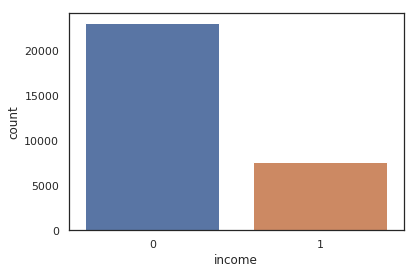

In [90]:
# Count of >50K & <=50K
sns.countplot(dataset['income'],label="Count")
plt.show()

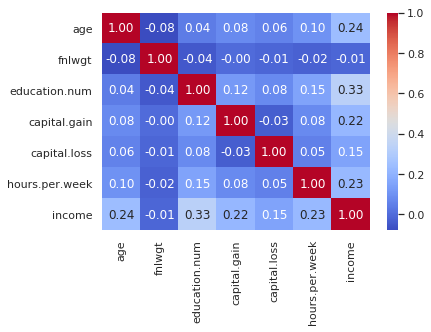

In [91]:
# Correlation matrix between numerical values
g = sns.heatmap(dataset[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

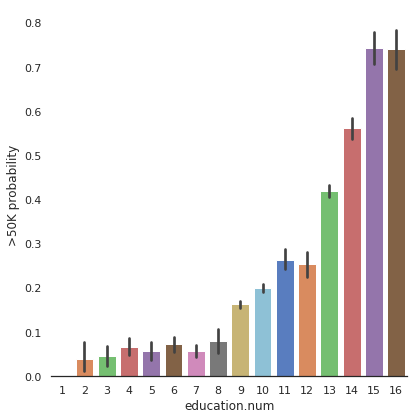

In [92]:
# Explore Education Num vs Income
g = sns.factorplot(x="education.num",y="income",data=dataset,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

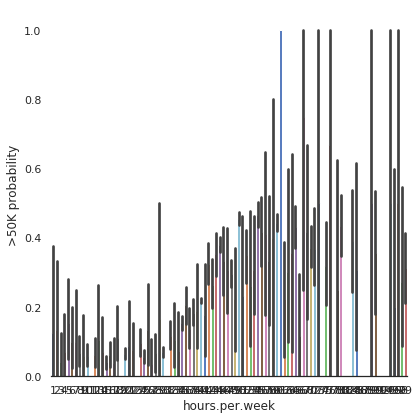

In [93]:
# Explore Hours Per Week vs Income
g  = sns.factorplot(x="hours.per.week",y="income",data=dataset,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

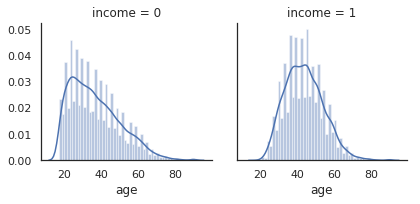

In [94]:
# Explore Age vs Income
g = sns.FacetGrid(dataset, col='income')
g = g.map(sns.distplot, "age")
plt.show()

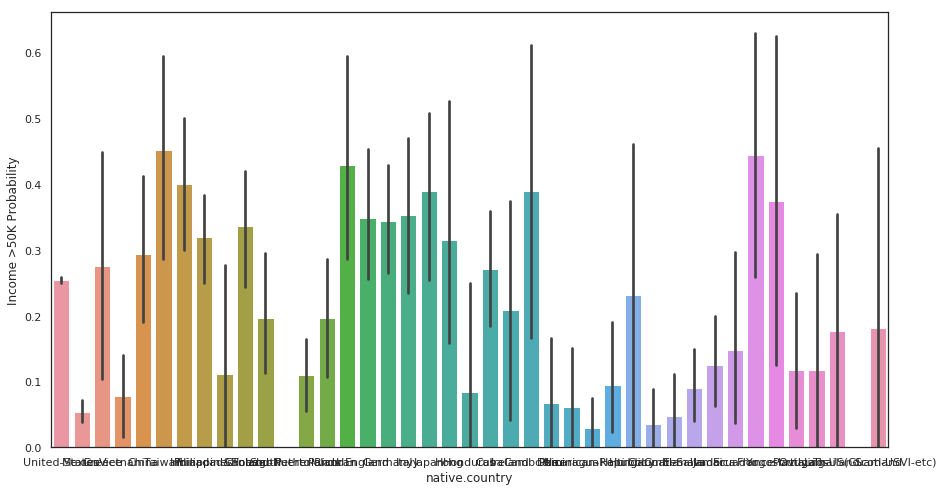

In [97]:
# Explore Native Nation vs Income
fig, ax = plt.subplots(figsize=(15,8))
g = sns.barplot(x="native.country",y="income",data=dataset, ax=ax)
g = g.set_ylabel("Income >50K Probability")
plt.show()

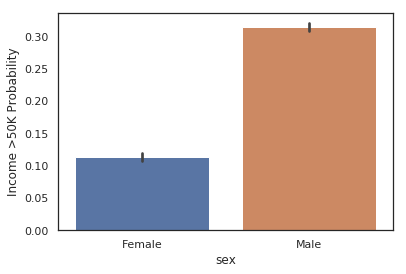

In [99]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=dataset)
g = g.set_ylabel("Income >50K Probability")
plt.show()

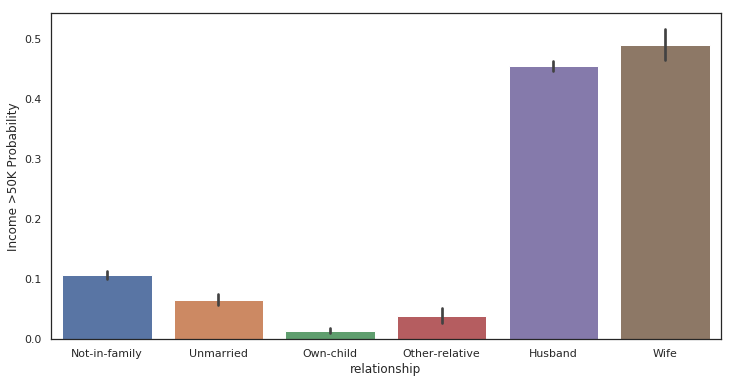

In [122]:
# Explore Relationship vs Income
fig, ax = plt.subplots(figsize=(12,6))
g = sns.barplot(x="relationship",y="income",data=dataset,ax=ax)
g = g.set_ylabel("Income >50K Probability")
plt.show()

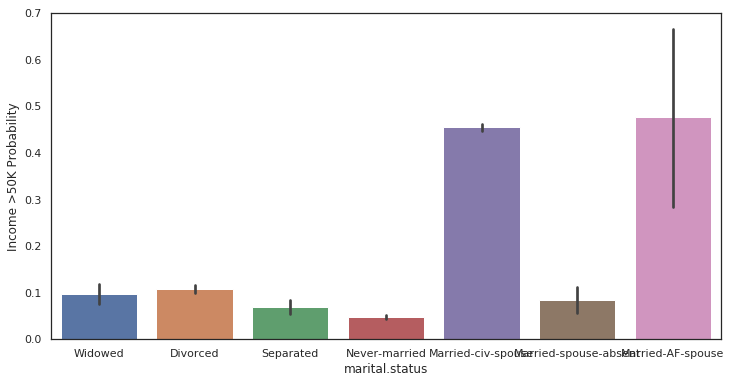

In [126]:
# Explore Marital Status vs Income
fig, ax = plt.subplots(figsize=(12,6))
g = sns.barplot(x="marital.status",y="income",data=dataset,ax=ax)
g = g.set_ylabel("Income >50K Probability")
plt.show()

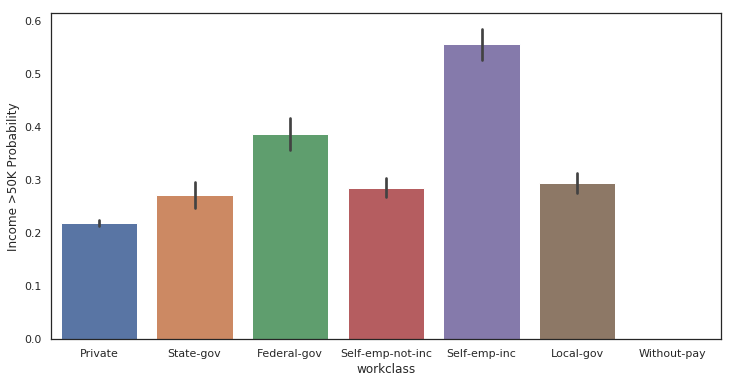

In [127]:
# Explore Workclass vs Income
fig, ax = plt.subplots(figsize=(12,6))
g = sns.barplot(x="workclass",y="income",data=dataset,ax=ax)
g = g.set_ylabel("Income >50K Probability")
plt.show()

# feature engineering


In [131]:
dataset['sex'] = dataset['sex'].map({"Male":0, "Female":1})
dataset["marital.status"] = dataset["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
dataset["marital.status"] = dataset["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
dataset["marital.status"] = dataset["marital.status"].map({"Married":1, "Single":0})
dataset["marital.status"] = dataset["marital.status"].astype(int)

In [132]:
#drop some classes for test
dataset.drop(labels=["workclass","education","occupation","relationship","race","native.country"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
print(dataset.head())

KeyError: "['workclass' 'education' 'occupation' 'relationship' 'race'\n 'native.country'] not found in axis"

# Modeling 

In [133]:
array = dataset.values
X = array[:,0:8]
Y = array[:,8]
print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y)
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=validation_size,random_state=seed)

Split Data: X
[[    82 132870      9 ...      0   4356     18]
 [    54 140359      4 ...      0   3900     40]
 [    41 264663     10 ...      0   3900     40]
 ...
 [    40 154374      9 ...      0      0     40]
 [    58 151910      9 ...      0      0     40]
 [    22 201490      9 ...      0      0     20]]
Split Data: Y
[0 0 0 ... 1 0 0]


In [134]:
# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
#models.append(('SVM', SVC()))
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.790876 (0.006769)
LDA: 0.824326 (0.008067)
KNN: 0.767885 (0.007098)
CART: 0.802718 (0.008135)
NB: 0.789004 (0.006870)
RF: 0.834947 (0.007550)


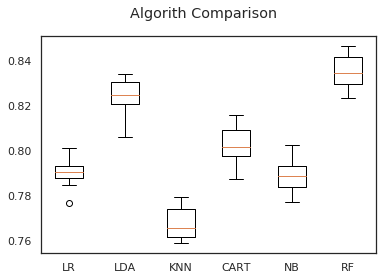

In [135]:
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [136]:
results

[array([0.80065094, 0.78885273, 0.79373474, 0.79007323, 0.8013838 ,
        0.79120879, 0.77696378, 0.78510379, 0.79283679, 0.78795279]),
 array([0.83401139, 0.82139951, 0.83116355, 0.81733116, 0.83394383,
        0.82498982, 0.80626781, 0.82051282, 0.82498982, 0.82865283]),
 array([0.77746135, 0.76729048, 0.76606998, 0.76078112, 0.77981278,
        0.77655678, 0.76556777, 0.75905576, 0.76556777, 0.76068376]),
 array([0.81611066, 0.79617575, 0.81041497, 0.79780309, 0.81155881,
        0.7985348 , 0.78754579, 0.80545381, 0.7985348 , 0.80504681]),
 array([0.80268511, 0.79048007, 0.78763222, 0.79414158, 0.79405779,
        0.79120879, 0.77737078, 0.78306878, 0.78754579, 0.78184778]),
 array([0.84336859, 0.82872254, 0.84662327, 0.82465419, 0.84371184,
        0.83312983, 0.82336182, 0.83435083, 0.83475783, 0.83679284])]

In [138]:
#Commented Out to Reduce Script Time - Took 20 Minutes to run.
n_estimator = 250
max_feature = 5
# Tune Random Forest
n_estimators = np.array([50,100,150,200,250])
max_features = np.array([1,2,3,4,5])
param_grid = dict(n_estimators=n_estimators,max_features=max_features)
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.836046 using {'max_features': 4, 'n_estimators': 200}
0.835599 (0.008698) with: {'max_features': 1, 'n_estimators': 50}
0.832831 (0.007327) with: {'max_features': 1, 'n_estimators': 100}
0.832954 (0.007688) with: {'max_features': 1, 'n_estimators': 150}
0.834459 (0.007947) with: {'max_features': 1, 'n_estimators': 200}
0.833645 (0.007156) with: {'max_features': 1, 'n_estimators': 250}
0.834744 (0.006640) with: {'max_features': 2, 'n_estimators': 50}
0.832831 (0.007124) with: {'max_features': 2, 'n_estimators': 100}
0.832709 (0.007579) with: {'max_features': 2, 'n_estimators': 150}
0.832831 (0.007209) with: {'max_features': 2, 'n_estimators': 200}
0.832791 (0.007017) with: {'max_features': 2, 'n_estimators': 250}
0.834581 (0.007865) with: {'max_features': 3, 'n_estimators': 50}
0.835843 (0.006641) with: {'max_features': 3, 'n_estimators': 100}
0.834012 (0.008175) with: {'max_features': 3, 'n_estimators': 150}
0.834378 (0.006366) with: {'max_features': 3, 'n_estimators': 200}
0.8

In [139]:
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


Accuracy: 83.96809895833334%
[[4219  393]
 [ 592  940]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4612
           1       0.71      0.61      0.66      1532

    accuracy                           0.84      6144
   macro avg       0.79      0.76      0.78      6144
weighted avg       0.83      0.84      0.84      6144

